In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import utils as utils

sns.set_color_codes("muted") 


# Load the data

https://www.kaggle.com/austinreese/craigslist-carstrucks-data


In [ ]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data -p data

!unzip data/craigslist-carstrucks-data.zip -d data


# Explore the data

## 1. Identify variables

In [2]:

df_vehicles = pd.read_csv('./data/vehicles.csv')


In [3]:
df_vehicles.head()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
df_vehicles.shape


(426880, 26)

In [5]:
df_vehicles.columns


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [6]:
df_vehicles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

**Comments**


- 426,880 rows, 26 attributes


-  `id`, `url`, `region_url`, `image_url`, `post_date`, and `VIN` are useless features


- There are numerous categorical variables plus 6 numerical variables(id, price, year, odometer, lat, long).

    - year, type casting -> date
    

- The variable 'county' has no value at all



## 2. Examine data quality


### 2.1 Duplicated rows


In [7]:

utils.check_duplicated(df_vehicles)


No duplicated rows!


### 2.2 Missing values

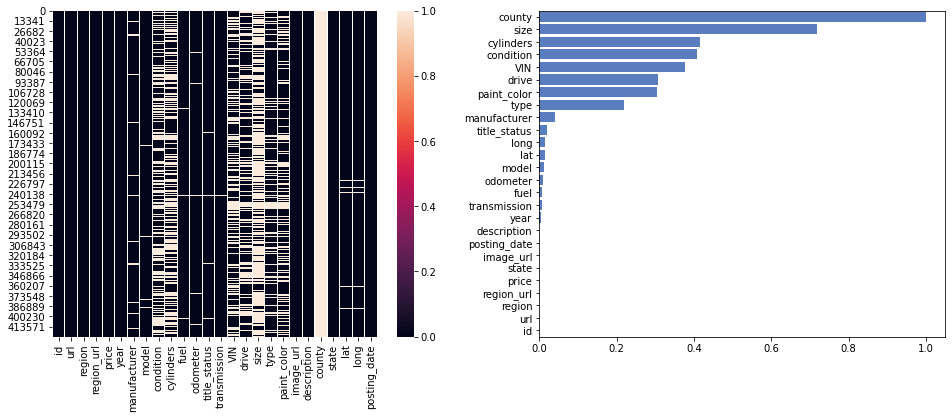

Index(['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size',
       'type', 'paint_color', 'image_url', 'description', 'county', 'lat',
       'long', 'posting_date'],
      dtype='object')

In [8]:
utils.missing_heatmap(df_vehicles)


In [9]:
utils.missing_table(df_vehicles, 0)


,counts,percent
county,426880,100.0
size,306361,72.0
cylinders,177678,42.0
condition,174104,41.0
VIN,161042,38.0
drive,130567,31.0
paint_color,130203,31.0
type,92858,22.0
manufacturer,17646,4.0
title_status,8242,2.0


**Comments**

Almost all features consist of null values. We can remove or impute them.


- 50%, drop columns directly
 - county, size


- 10% ~ 50%, impute
   - cylinders, condition, drive, paint_color, type


- 0 - 10%, impute


### 2.3 Outliers

Q: What is  outliers?

They are extreme high or low values.


Q: Where do they come from?

well, there are many reasons:

- the data itself is an extreme value

- introduced by human or mechanical error

- imputed by replacing missing values



Q: How do we detect them?

- Statistics

- visualisation
 - box plot
 - histgram
 - scatterplot

- IQR

- Z-score
  - It measures how many standard deviations a given observation is far from the mean. Data that far away from the center, say `3`, are considered as outerliers.


- Kmeans



Q: How do we deal with them?

- Trimming

- Chopp off

- Discretization



#### 2.3.1 Detection

In [10]:
df_vehicles.describe()


,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


- Price and odometer have outliers.


- the difference between 75% percentile and the max value is too large.



#### 2.3.2 Boxplot

<AxesSubplot:ylabel='price'>

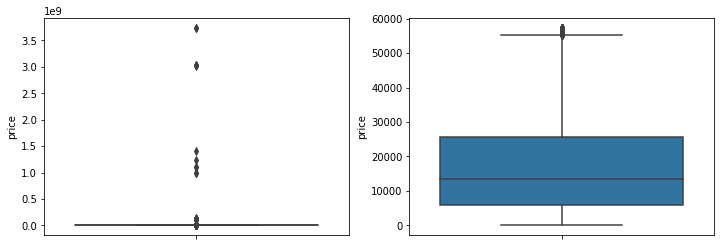

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# 1. plot the original data
sns.boxplot(data=df_vehicles, y='price', ax=ax[0])

# 2. plot price after using IQR
cutted_price, _, _ = utils.cutIQR(df_vehicles, 'price', q1=0.25, q2=0.75)
sns.boxplot(data=cutted_price, y='price', ax=ax[1])


count    418095.000000
mean      89570.028718
std       60433.980252
min           0.000000
25%       37218.000000
50%       84571.000000
75%      131710.000000
max      277231.000000
Name: odometer, dtype: float64

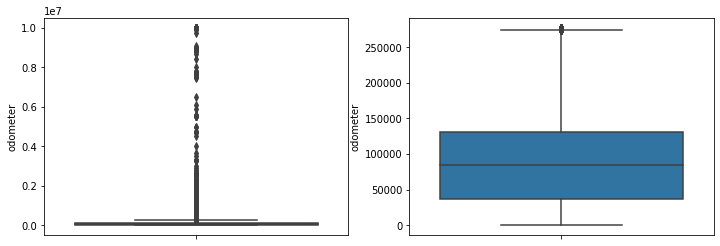

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# 1. plot the original data
sns.boxplot(data=df_vehicles, y='odometer', ax=ax[0])

# 2. plot price after using IQR
cutted_odometer, _, _ = utils.cutIQR(df_vehicles, 'odometer', q1=0.25, q2=0.75)

sns.boxplot(data=cutted_odometer, y='odometer', ax=ax[1])

cutted_odometer['odometer'].describe()


count    418703.000000
mean      16342.802827
std       13148.416258
min           0.000000
25%        5799.000000
50%       13495.000000
75%       25590.000000
max       57341.000000
Name: price, dtype: float64

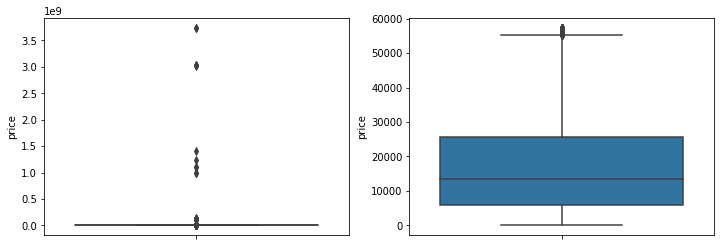

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# 1. plot the original data
sns.boxplot(data=df_vehicles, y='price', ax=ax[0])

# 2. plot price after using IQR
cutted_price, upper_price, lower_price = utils.cutIQR(df_vehicles, 'price', q1=0.25, q2=0.75)

sns.boxplot(data=cutted_price, y='price', ax=ax[1])

cutted_price['price'].describe()


#### 2.3.3 IQR

```
IQR detection = 75% - 25%

upper inner fence = 75% + 1.5 * IQR
lower inner fence = 25% - 1.5 * IQR

upper outer fence = 75% + 3 * IQR
lower outer fence = 25% - 3 * IQR
```


In [23]:
_, upper_inner_price, _ = utils.cutIQR(df_vehicles, 'price', q1=0.25, q2=0.75, r = 1.5)
upper_inner_percent = (df_vehicles['price'] > upper_inner_price).sum() / len(df_vehicles) * 100


_, upper_outer_price, _ = utils.cutIQR(df_vehicles, 'price', q1=0.25, q2=0.75, r = 3)
upper_outer_percent = (df_vehicles['price'] > upper_outer_price).sum() / len(df_vehicles) * 100


pd.DataFrame([upper_inner_percent, upper_outer_percent], 
             columns=['Percent'], index=['upper inner', 'upper outer'])



,Percent
upper inner,1.915527
upper outer,0.250890


In [24]:
_, upper_inner_odometer, _ = utils.cutIQR(df_vehicles, 'odometer', q1=0.25, q2=0.75, r = 1.5)
upper_inner_percent = (df_vehicles['odometer'] > upper_inner_odometer).sum() / len(df_vehicles) * 100


_, upper_outer_odometer, _ = utils.cutIQR(df_vehicles, 'odometer', q1=0.25, q2=0.75, r = 3)
upper_outer_percent = (df_vehicles['odometer'] > upper_outer_odometer).sum() / len(df_vehicles) * 100


pd.DataFrame([upper_inner_percent, upper_outer_percent], 
             columns=['Percent'], index=['upper inner', 'upper outer'])



,Percent
upper inner,1.027221
upper outer,0.379263


#### 2.3.4 z-score

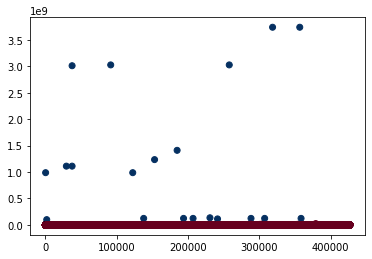

In [25]:

utils.zscore_outlier(df_vehicles['price'])


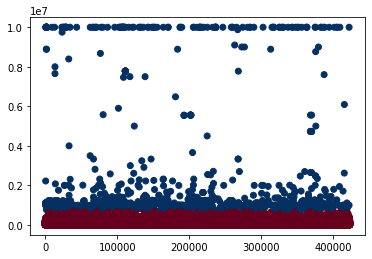

In [26]:
utils.zscore_outlier(df_vehicles['odometer'].dropna())


#### 2.3.5 Clustering

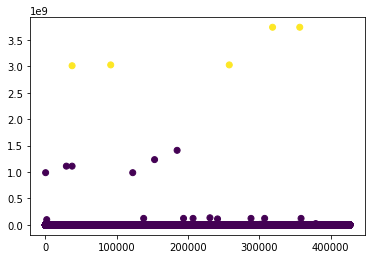

In [27]:
from sklearn.cluster import KMeans

df_price = df_vehicles[['price']]

kmeans = KMeans(n_clusters=2, random_state=0).fit(df_price)

plt.scatter(np.arange(len(df_price)), df_price, c=kmeans.labels_)
plt.show()


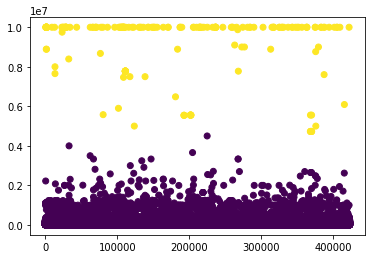

In [28]:
df_odometer = df_vehicles[['odometer']].dropna()

kmeans = KMeans(n_clusters=2, random_state=0).fit(df_odometer)

plt.scatter(np.arange(len(df_odometer)), df_odometer, c=kmeans.labels_)
plt.show()


#### 2.3.6 Processing

#### 2.3.6.1 Trimming

In [29]:
df_odometer = df_vehicles[['odometer']].dropna()

df_odometer.max()


odometer    10000000.0
dtype: float64

In [30]:
df_odometer_second_max = df_odometer[df_odometer != df_odometer.max()]
df_odometer_second_max.max()


odometer    9999999.0
dtype: float64

In [31]:
df_odometer_third_max = df_odometer_second_max[df_odometer_second_max != df_odometer_second_max.max()]


/Users/wuxiaopan/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/wuxiaopan/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


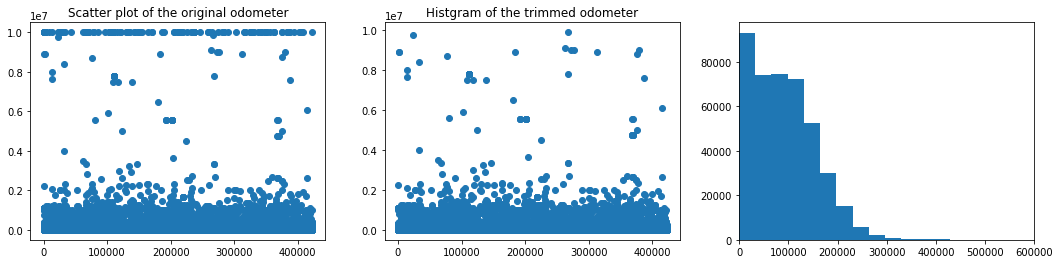

In [32]:
fig,ax= plt.subplots(1, 3, figsize=(18, 4))

ax[0].scatter(np.arange(len(df_odometer)), df_odometer)
ax[0].set_title('Scatter plot of the original odometer')

ax[1].scatter(np.arange(len(df_odometer_third_max)), df_odometer_third_max)
ax[1].set_title('Scatter plot of the trimmed odometer')

ax[2].hist(df_odometer_third_max, bins=300)
ax[2].set_xlim(0, 600000)
ax[1].set_title('Histgram of the trimmed odometer')

plt.show()


#### 2.3.6.2 Chopping


In [42]:
df_price_chopped = df_vehicles['price'].copy()

# (0, upper_price]
df_price_chopped.loc[ df_price_chopped > upper_inner_price ] = upper_inner_price
df_price_chopped = df_price_chopped[df_price_chopped > 0] # 5000 seems reasonable

df_price_chopped.max()


57364.375

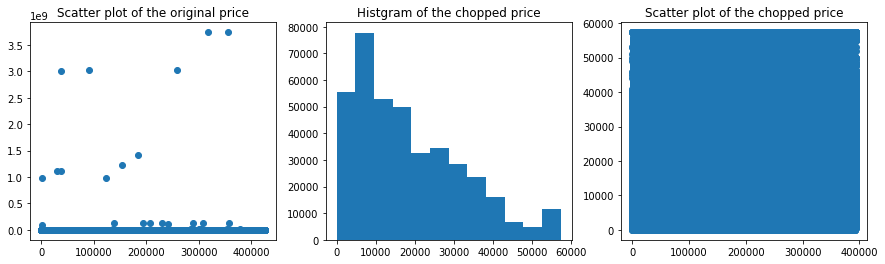

In [43]:
fig, ax= plt.subplots(1, 3, figsize=(15, 4))

# original data
ax[0].scatter(np.arange(len(df_vehicles['price'])), df_vehicles['price'])
ax[0].set_title('Scatter plot of the original price')

# transformed data
ax[1].hist(df_price_chopped, bins=12)
ax[1].set_title('Histgram of the chopped price')

ax[2].scatter(np.arange(len(df_price_chopped)), df_price_chopped)
ax[2].set_title('Scatter plot of the chopped price')

plt.show()


#### 2.3.6.3 Discretization


1) Equal Frequency binning

In [44]:
item_binned, intervals = pd.qcut(df_vehicles['price'], 10, 
                                 labels=None, retbins=True, 
                                 precision=3, duplicates='drop')

print(intervals)

binned_price = pd.concat([ item_binned, df_vehicles['price'] ], axis=1)

binned_price.columns = ['bins', 'price']

binned_price.groupby('bins')['price'].count()


[0.00000000e+00 5.00000000e+02 4.50000000e+03 6.99500000e+03
 9.99500000e+03 1.39500000e+04 1.79900000e+04 2.33000000e+04
 2.97770000e+04 3.75900000e+04 3.73692871e+09]


bins
(-0.001, 500.0]            43115
(500.0, 4500.0]            44066
(4500.0, 6995.0]           41749
(6995.0, 9995.0]           44664
(9995.0, 13950.0]          39946
(13950.0, 17990.0]         43175
(17990.0, 23300.0]         42107
(23300.0, 29777.0]         42712
(29777.0, 37590.0]         43192
(37590.0, 3736928711.0]    42154
Name: price, dtype: int64

2) Equal width binning

$$
width = (max-min)/N
$$



## 3. Univariate Analysis

### Numerical variable

/Users/wuxiaopan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


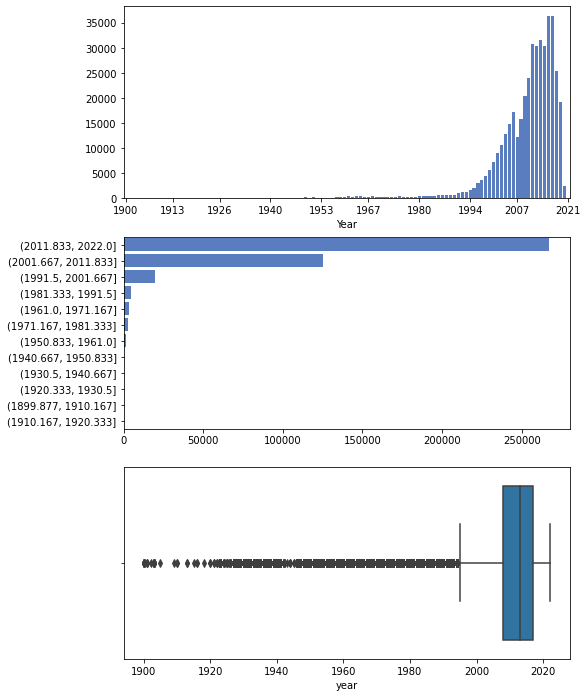

In [47]:
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

year_counts = df_vehicles['year'].value_counts()
g = sns.barplot(x=year_counts.index, y=year_counts.values, color='b', ax=ax[0])
ax[0].set_xlabel('Year')
xmin, xmax = ax[0].get_xlim()
ax[0].set_xticks(np.linspace(xmin, xmax, 10, dtype=int))
ax[0].set_xticklabels(np.linspace(1900, 2021, 10, dtype=int))

decades_counts = df_vehicles['year'].value_counts(bins=12)
g=sns.barplot(x=decades_counts.values, y=decades_counts.index, color='b', ax=ax[1])

sns.boxplot(df_vehicles['year'], ax=ax[2])

plt.show()


- Most used cars were made after 2000.


### Categorical Distribution

In [ ]:
cat_features = [
    'region', 'state', 'model', # region(405), state(51), model(29668)
    'size', 'manufacturer', 'condition', 'cylinders', 
    'fuel', 'title_status', 'transmission', 
    'drive', 'type', 'paint_color'
]

utils.categorical_eda(df_vehicles, columns = cat_features[3:])


## 4. Bivariate Analysis

In [48]:
# simple cleaning

cleaned_df = df_vehicles.dropna(subset=['year'])
cleaned_df = cleaned_df.drop(['id', 'county'], axis=1)

# (5000, upper_price]
_, upper_inner_price, _ = utils.cutIQR(cleaned_df, 'price', q1=0.25, q2=0.75, r = 1.5)
cleaned_df.loc[ cleaned_df['price'] > upper_inner_price, 'price' ] = upper_inner_price
cleaned_df = cleaned_df[ cleaned_df['price'] > 5000 ] # 5000 seems reasonable

cleaned_df = cleaned_df[cleaned_df['odometer'] != 10000000]
cleaned_df = cleaned_df[cleaned_df['odometer'] != 9999999.0]


### 1) Numerical vs Numerical

#### Correlation

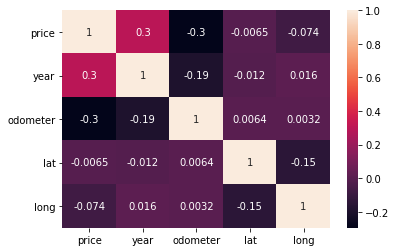

In [49]:
corr_matrix = cleaned_df.corr()

sns.heatmap(corr_matrix, annot=True)

plt.show()


#### By Year

<AxesSubplot:xlabel='year', ylabel='price'>

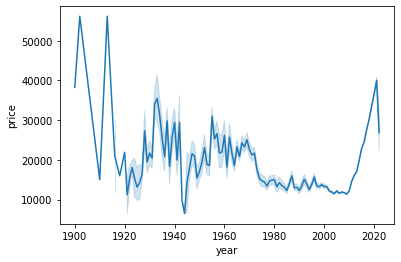

In [50]:
sns.lineplot(data=cleaned_df, x ='year', y = 'price')


- Antique cars (over 100 years) are the most expensive cars


- The price of cars made between 1920 and 1960 fluctuate significantly.


- After 1960, the price decreased constantly until 2000.


- The newer the cars are, the more expensive the price in the recent 20 years.



### By Odometer

<AxesSubplot:xlabel='odometer', ylabel='price'>

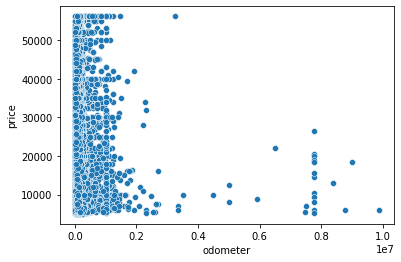

In [51]:
sns.scatterplot(data=cleaned_df, x='odometer', y = 'price')


## 2) Categorical vs Numerical

<AxesSubplot:xlabel='company', ylabel='score'>

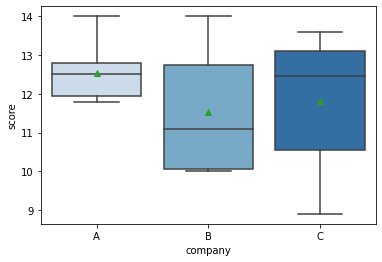

In [52]:

A = [12.6, 12, 11.8, 11.9, 13, 12.5, 14]
B = [10, 10.2, 10, 12, 14, 13]
C = [10.1, 13, 13.4, 12.9, 8.9, 10.7, 13.6, 12]

all_scores = A+B+C
company_names = ['A']*len(A)+ ['B']*len(B)+ ['C']*len(C)
data = pd.DataFrame({'company': company_names, 'score': all_scores})


sns.boxplot(data=data, y='score', x='company', showmeans=True, palette="Blues")


In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm=ols('score~company', data=data).fit()
sm.stats.anova_lm(lm)


,df,sum_sq,mean_sq,F,PR(>F)
company,2.0,3.606905,1.803452,0.821297,0.455683
Residual,18.0,39.525476,2.195860,NaN,NaN


In [54]:
score_mean = data['score'].mean()
score_mse = sum((data['score']-score_mean)**2)

company_mean = data.groupby('company').mean()
company_mean=company_mean.rename(columns={'score': 'group_mean'})

data = data.merge(company_mean, left_on='company', right_index=True)
data['mean'] = [score_mean] * len(data)


In [55]:
ss_residual=sum((data['score']-data['group_mean'])**2)
ss_explained = sum((data['mean']-data['group_mean'])**2)

print('sum of squared residual', ss_residual)
print('sum of squared company', ss_explained)

n_group = len(data['company'].unique())
ms_residual = ss_residual / (len(data) - n_group)
ms_explained = ss_explained / (n_group - 1)
print('mean sq residual', ms_residual)
print('mean sq explained', ms_explained)

f_score = ms_explained/ms_residual
print('f_score', f_score)

import scipy.stats
p_value = 1 - scipy.stats.f.cdf(f_score, n_group-1, len(data)-n_group)
p_value


sum of squared residual 39.52547619047619
sum of squared company 3.6069047619047776
mean sq residual 2.1958597883597886
mean sq explained 1.8034523809523888
f_score 0.8212966923081592


0.4556832940515221